# Final HW GW STAT 2118 in Python

## Purpose

The purpose of this Jupyter notebook is to demonstrate how to run regression analysis in Python which does seem to be currently the most popular language for data science in industry (especially in tech). I could see something like this being used in a programming-heavy course on regression (or perhaps an undergraduate intro to data science course). 

## The outline of this notebook performs the same regression analysis in 3 different ways. 

1. The first is with the Python package __numpy__ for scientific computing. This can be used for all manipulations with matrices, linear algebra computations, among others. The functions are similar to how you would perform regression in R physically showing all the matrix manipulations. It has the advantage over SAS in that it allows the students to see what's happening under the hood in terms of matrix manipulations. In my experience as a teaching assistant for the undergraduate regression course, several students don't seem to understand that matrix multiplication works the same exact way no matter the dimensions of the matrices. They understand the examples that have 4 or 5 data points, but sometimes when asked about how to do things with 100 data points, they don't quite understand that it's done in the exact same way. 

2. The second is with the Python package __statsmodels__ for a more packaged rigorous statistical analysis similar to what you'd expect from R. The output from the OLS method in this package is very similar to the output from the R function summary(lm(y~., data=df)). This is probably the most similar functionality you'd get from PROC REG in SAS in that it just spits out everything you need without knowing exactly what Python is doing behind the scenes. 

3. The third is with the Python package __sci-kit learn (sklearn)__ for machine learning/predictive modeling. This package makes it very easy to implement machine learning models, but it does lack in rigorous statistical analysis. You can get a few validation metrics such as R^2 but not much else.

One disadvantage with using Python is I haven't found a ready-to-go method for model selection like forward selection, backward elimination, stepwise regression, or subset regression. I've coded myself backward elimination below, which could just be used. Or perhaps in a more programming heavy regression course in the future, it would be a good homework problem. 

In [ ]:
# Final HW STAT 2118

# In Python, we need to import certain packages to do mathematical and data manipulations as well as visualiztion.

import numpy as np # for working with matrices and doing linear algebra (think of np as a nickname for numpy)
import pandas as pd # for working with data frames (think of pd as a nickname for pandas)
import scipy # for working with specific mathematical and statistical functions
import sklearn # for working with machine learning models
import matplotlib.pyplot as plt # for visualization
import statsmodels.api as sm # for doing more rigorous statistical analysis similar to R

# for visualizing inside this Jupyter Notebook
%matplotlib inline 

In [2]:
# reading in data file as a data frame
data = pd.read_csv('C:/Users/Samuel/Documents/GW/Regression Analysis/class - fall 2018.csv') 

In [3]:
data.dtypes # look at types of data in the data frame

ID         int64
HW1       object
HW2       object
HW3       object
MT1      float64
HW4       object
HW5       object
HW6       object
MT2      float64
HW7       object
Final    float64
dtype: object

In [4]:
# Inspect the top of the dataset
data.head(15)

,ID,HW1,HW2,HW3,MT1,HW4,HW5,HW6,MT2,HW7,Final
0,1,20,8,12,28.00,20,16,18,24.0,20,32.0
1,2,19,18.5,16.5,37.50,19,19,14.5,36.5,20,40.0
2,3,16,18,16,24.00,20,18,20,34.0,20,46.0
3,4,20,18,16.5,36.50,19,16.5,16,37.0,20,33.0
4,5,20,20,20,40.00,20,20,20,40.0,20,50.0
5,6,16,20,14,40.00,20,20,20,39.0,20,44.0
6,7,19,19.25,19,37.25,20,18,19,36.0,20,48.0
7,8,13.25,14,12,30.00,18,20,14,21.0,18,31.0
8,9,18,18,15.5,36.75,20,20,12.5,39.0,20,37.0
9,10,19.75,20,19.5,37.50,19,19.75,19,39.5,20,47.0


In [5]:
# deal with missing values via imputation or other method
df = data.copy() # create copy of original dataset
df.replace(to_replace='.', value=0, inplace=True) # replace missing values with 0
df = pd.DataFrame(df, dtype=float) # convert all data types to floats
df.dtypes

ID       float64
HW1      float64
HW2      float64
HW3      float64
MT1      float64
HW4      float64
HW5      float64
HW6      float64
MT2      float64
HW7      float64
Final    float64
dtype: object

In [6]:
# deal with missing values via removal - matches what SAS does
df_clean = data.copy() # create copy of original dataset
df_clean.replace(to_replace='.', value=np.nan, inplace=True) # replace missing values with NaN to remove
df_clean.dropna(axis=0, inplace=True) # remove NaNs (axis=0 means it removes rows with missing values, axis=1 would mean columns)
df_clean = pd.DataFrame(df_clean, dtype=float) # convert all data types to floats
df_clean.shape # look at dimensions of clean data frame

(118, 11)

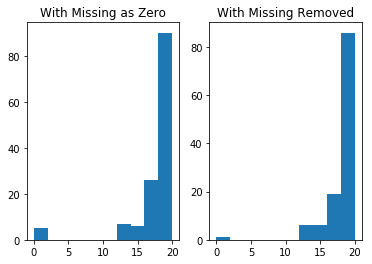

In [7]:
plt.figure() # create figure space

plt.subplot(121) # set up figure space of dimensions 1 x 2. The final '1' in 121 refers to the position in the 1x2 dimensions
plt.hist(df['HW1']) # plot histogram of HW1 variable
plt.title('With Missing as Zero')

plt.subplot(122) # same figure space with 1x2 dimensions, but now the final '2' refers to the second position in this space
plt.hist(df_clean['HW1'])
plt.title('With Missing Removed')

In [8]:
# To produce same results as SAS, use data with missing values removed.
df_clean.columns # list columns in the dataset

Index(['ID', 'HW1', 'HW2', 'HW3', 'MT1', 'HW4', 'HW5', 'HW6', 'MT2', 'HW7',
       'Final'],
      dtype='object')

In [9]:
grades = df_clean.iloc[:,1:] # remove ID column
grades.head()

,HW1,HW2,HW3,MT1,HW4,HW5,HW6,MT2,HW7,Final
0,20.0,8.0,12.0,28.0,20.0,16.0,18.0,24.0,20.0,32.0
1,19.0,18.5,16.5,37.5,19.0,19.0,14.5,36.5,20.0,40.0
2,16.0,18.0,16.0,24.0,20.0,18.0,20.0,34.0,20.0,46.0
3,20.0,18.0,16.5,36.5,19.0,16.5,16.0,37.0,20.0,33.0
4,20.0,20.0,20.0,40.0,20.0,20.0,20.0,40.0,20.0,50.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0662B5518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F066583DD8>]], dtype=object)

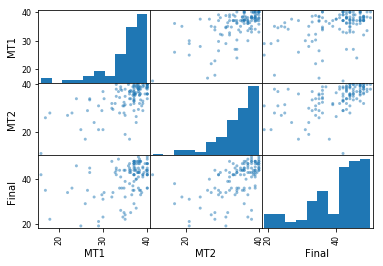

In [10]:
# To get a scatterplot matrix - takes a while to run (also hard to read with lots of variables when printing 'inline')
from pandas.plotting import scatter_matrix # don't need to import entire pandas.plotting module, can just import part
scatter_matrix(grades[['MT1', 'MT2', 'Final']]) # let's just look at 2 predictors and the response variable

In [11]:
# Let's first get a sense of
grades.describe()

,HW1,HW2,HW3,MT1,HW4,HW5,HW6,MT2,HW7,Final
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,18.129237,17.713983,17.283898,35.309322,18.836864,18.875000,16.919492,34.093220,19.224576,40.029661
std,2.702036,3.609146,3.062894,4.961032,3.302967,2.767089,3.010644,5.698984,1.869226,7.692902
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,4.250000,11.000000,12.000000,19.000000
25%,17.500000,17.500000,16.000000,34.062500,19.000000,19.000000,15.062500,31.625000,20.000000,35.000000
50%,19.000000,19.000000,18.000000,37.000000,20.000000,20.000000,18.000000,36.000000,20.000000,43.000000
75%,20.000000,20.000000,19.500000,38.250000,20.000000,20.000000,19.187500,38.000000,20.000000,45.375000
max,20.000000,20.000000,20.000000,40.000000,20.000000,20.000000,20.000000,40.000000,20.000000,50.000000


## Numpy

In [12]:
# Run Linear Regression with Linear Algebra (note in Python slicing is of the form [a,b) i.e. b not included, unlike in R)
X_df = grades.iloc[:,:-1] # separte our predictor variables from our response in our data frame (-1 refers to the last)
y_df = grades.iloc[:,-1] # extract to the final column

# Here we convert our pandas data frames to numpy matrices (aka arrays)
# np.hstack() is like cbind() in R
X = np.hstack((np.ones((X_df.shape[0],1)),np.array(X_df))) # add column of ones to create design matrix
y = np.array(y_df)

print(X.shape, y.shape)
y = y.reshape((y.shape[0],1))
print(y.shape) 

(118, 10) (118,)
(118, 1)


- You can see there is a difference in the dimensions (118, ) and (118, 1). Sometime you need one format and other times you need the other. It all depends on which functions and methods these arrays are being fed into. 
- (R,) is a vector or a 1-D array
- (R,1) is a 2-D array that happens to only have one column
- See this explanation for more details: 
https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

In [13]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

- to find our estimates of regression coefficients, we perorm the linear algebra operations
- np.linalg.inv(A) finds the inverse of a matrix (assuming one exists)
- A.T as you can imagine is the transpose of matrix A
- A.dot(B) is the product of matrices A and B 

In [14]:
b = b.reshape((X.shape[1],1)) # Regression coefficients match SAS
b.shape

(10, 1)

In [15]:
print(range(2,6)) # range is basically made for iterating i.e. it won't print out a list of its elements itself
print(list(range(2,6))) # to see what's in this list, use list() function

range(2, 6)
[2, 3, 4, 5]


In [16]:
# Is there multicollinearity?
vif = [] # initialize empty list of variance inflation factors to append to

for i in range(1,(X[:,1:].shape[1]+1)): 
    X_vif = np.delete(X, (i), axis=1) # delete ith column (predictor) from design matrix
    y_vif = X[:,i:(i+1)] # use ith predictor to regress on the rest
    b_vif = np.linalg.inv(X_vif.T.dot(X_vif)).dot(X_vif.T).dot(y_vif) # vif regression coefficient estimates
    yhat_vif = X_vif.dot(b_vif) # estimated responses for vif
    e_vif = (y_vif - yhat_vif).reshape((y_vif.shape[0],1)) # vif residuals
    sse_vif = np.sum(np.power(e_vif,2))  # vif SSE
    sst_vif = np.sum(np.power(y_vif - y_vif.mean(),2)) # vif SSTO
    ssr_vif = sst_vif - sse_vif # vif SSR
    R2_i = ssr_vif / sst_vif # R^2_i
    vif_i = 1 / (1 - R2_i) # ith variance inflation factor
    vif.append(vif_i) # add to our vif list

vif # not really, certainly no variance inflation factors over 10

[2.3092948546472596,
 2.5116479193676402,
 2.185809702691857,
 2.4873999172127634,
 1.7579489966679791,
 1.7349609671485051,
 1.3052248126157402,
 2.5026047164621446,
 1.4804473147006614]

In [17]:
# Cook's Distance
yhat = X.dot(b)
e = y - yhat
e = e.reshape((e.shape[0],1)) # reshape the residuals into a 2-D array with one column
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T) # Hat matrix (projection matrix): yhat = Hy
hi = np.reshape(np.diag(H), (np.diag(H).shape[0],1)) # Leverage
mse = np.sum(np.power(e,2)) / (X.shape[0] - X.shape[1]) # MSE matches SAS
cooksD = (np.power(e,2) / (mse * X.shape[1])) * (hi / np.power((1 - hi),2)) # formula with leverage

In [18]:
cooksD.shape

(118, 1)

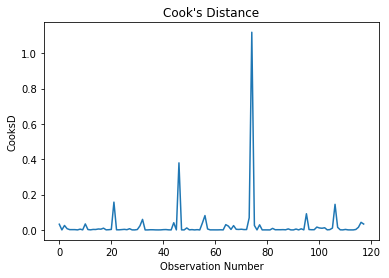

In [19]:
# plot Cook's Distance by observation - couldn't find a needle plot like in SAS, but this gets the idea across 
plt.plot(cooksD)
plt.title('Cook\'s Distance')
plt.xlabel('Observation Number')
plt.ylabel('CooksD')          

In [20]:
np.sum(cooksD>.5) # only one observation has cooks distance higher than .5
influential_obs = np.where(cooksD.ravel()>.5) # np.ravel flattens to shape(n,); np.where() is like which() in R
print(influential_obs, cooksD[np.where(cooksD>.5)]) # matches SAS

(array([74], dtype=int64),) [ 1.1187195]


In [21]:
# Remove influential observation
print(X[74:76,:]) # print observations 74 and 75
X_new = np.delete(X, (74), axis=0) # delete 74th observation (row)
print(X_new[74:76,:]) # print observations 74 and 75 to make sure it worked
y_new = np.delete(y, (74), axis=0)

[[  1.    12.    14.     6.    16.     0.     0.    14.    11.    20.  ]
 [  1.    18.75  17.    17.    34.5   19.    20.    11.75  31.    20.  ]]
[[  1.    18.75  17.    17.    34.5   19.    20.    11.75  31.    20.  ]
 [  1.    20.    20.    18.    38.    20.    20.    18.    37.    20.  ]]


In [22]:
# Re-Run Regression without this influential observation.
b_new = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y_new)
b_new # matches SAS

array([[ 9.94719582],
       [-0.42192619],
       [ 0.14680696],
       [ 0.09836213],
       [ 0.3538559 ],
       [ 0.02523333],
       [ 0.07564809],
       [ 0.13917565],
       [ 0.71293909],
       [-0.40875589]])

In [23]:
# ANOVA Table
yhat_new = X_new.dot(b_new)
e_new = y_new - yhat_new
sse = np.sum(np.power(e_new,2))
mse = sse / (X_new.shape[0] - X_new.shape[1]) # k = number of predictors, y_new.shape[1] = number of parameters = k + 1
ssr = np.sum(np.power(yhat_new - y_new.mean(),2)) # to raise each entry in an array to a power, use np.power()
msr = ssr / (X_new.shape[1]-1)
sst = np.sum(np.power(y_new - y_new.mean(),2))
print(sse + ssr, sst) # check 
f_stat = msr / mse

from scipy.stats import f # let's compute p-value of our F-statistic
p_val_f = 1 - f.cdf(f_stat, X_new.shape[1] - 1, X_new.shape[0] - X_new.shape[1])

print('F-Statistic: ', f_stat, 'p-value: ', p_val_f)


anova_data = [(X_new.shape[1] - 1, np.round(ssr,3), np.round(msr,3), np.round(f_stat,3), p_val_f),
             (X_new.shape[0] - X_new.shape[1], np.round(sse,3), np.round(mse,3), '', ''),
             (X_new.shape[0] - 1, np.round(sst,3), '', '', '')]

anova_table = pd.DataFrame(anova_data, columns=['Source', 'SS', 'MS', 'F', 'P-val'], index=['Model', 'Error', 'Total'])

anova_table

6920.23076923 6920.23076923
F-Statistic:  7.81740502027 p-value:  8.75982886228e-09


,Source,SS,MS,F,P-val
Model,9,2745.227,305.025,7.817,8.75983e-09
Error,107,4175.004,39.019,,
Total,116,6920.231,,,


In [24]:
# Estimate the standard deviation of the error term
s = np.sqrt(mse)
print('The estimate of sigma: ', np.round(s,3))

The estimate of sigma:  6.246


In [25]:
# Compute R^2 and Adjusted R^2
R2 = ssr / sst
R2_adj = 1 - (1 - R2) * (X_new.shape[0] - 1) / (X_new.shape[0] - X_new.shape[1])
print('R-Sqauared: ', R2, 'Adjusted R-Squared: ', R2_adj)

R-Sqauared:  0.396695850387 Adjusted R-Squared:  0.345950641541


In [26]:
# Variance-Covariance Matrix
cov_matrix = mse * np.linalg.inv(X_new.T.dot(X_new))

# Standard errors of regression coefficients
standard_errors = np.sqrt(np.diag(cov_matrix))

# t-statistics
t_stat = b_new.ravel() / standard_errors # with numpy operations, you can use np.operation(A) or A.operation()

# P-values
from scipy.stats import t
p_vals = 2*(1 - t.cdf(np.abs(t_stat), X_new.shape[0] - X_new.shape[1]))

# Create Parameter Estimates table as in SAS
param_est_data = np.hstack((b_new, standard_errors.reshape((X_new.shape[1],1)), t_stat.reshape((X_new.shape[1],1)), p_vals.reshape((X_new.shape[1],1))))
var_list = list(grades.columns[:-1])
var_list.insert(0, 'Intercept')
param_est_table = pd.DataFrame(param_est_data, columns=['Parameter Estimate', 'Standard Error', 't Value', 'Pr > |t|'], index=var_list)
param_est_table

,Parameter Estimate,Standard Error,t Value,Pr > |t|
Intercept,9.947196,8.422358,1.181046,0.240203
HW1,-0.421926,0.332539,-1.268802,0.207265
HW2,0.146807,0.279239,0.525740,0.600157
HW3,0.098362,0.279060,0.352477,0.725174
MT1,0.353856,0.184066,1.922436,0.057210
HW4,0.025233,0.252655,0.099873,0.920632
HW5,0.075648,0.321975,0.234950,0.814696
HW6,0.139176,0.220430,0.631381,0.529138
MT2,0.712939,0.163753,4.353741,0.000031
HW7,-0.408756,0.397344,-1.028721,0.305931


In [27]:
# Confidence Intervals for Regression Coefficients
# ppf (percent point function) is the inverse cdf
upper = b_new + t.ppf(.975, X_new.shape[0] - X_new.shape[1]) * standard_errors.reshape((X_new.shape[1],1))
lower = b_new - t.ppf(.975, X_new.shape[0] - X_new.shape[1]) * standard_errors.reshape((X_new.shape[1],1))
CI_b_data = np.hstack((lower, upper))
CI_b = pd.DataFrame(CI_b_data, columns=['Lower', 'Upper'], index=var_list)
CI_b

,Lower,Upper
Intercept,-6.749147,26.643538
HW1,-1.081146,0.237294
HW2,-0.406752,0.700366
HW3,-0.454842,0.651566
MT1,-0.011034,0.718746
HW4,-0.475626,0.526093
HW5,-0.562629,0.713926
HW6,-0.297802,0.576153
MT2,0.388317,1.037561
HW7,-1.196443,0.378932


## Statsmodels API

In [28]:
# Now using statsmodels api 
mlr = sm.OLS(y_new, X_new).fit() # OLS method of the statsmodels module (nicknamed 'sm')
print(mlr.params) # access the estimated regression coefficients via the parameters attribute
print(b_new) # check (from previous estimation with numpy)

[ 9.94719582 -0.42192619  0.14680696  0.09836213  0.3538559   0.02523333
  0.07564809  0.13917565  0.71293909 -0.40875589]
[[ 9.94719582]
 [-0.42192619]
 [ 0.14680696]
 [ 0.09836213]
 [ 0.3538559 ]
 [ 0.02523333]
 [ 0.07564809]
 [ 0.13917565]
 [ 0.71293909]
 [-0.40875589]]


In [29]:
mlr.summary() # similar to summary(lm(y~.)) and SAS output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     7.817
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           8.76e-09
Time:                        01:28:54   Log-Likelihood:                -375.14
No. Observations:                 117   AIC:                             770.3
Df Residuals:                     107   BIC:                             797.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9472      8.422      1.181      0.240      -6.749      26.644
x1            -0.4219      0.333     -1.269      0.207      -1.081       0.237
x2             0.1468      0.279      0.526      0.600      -0.407       0.700
x3             0.0984      0.279      0.352      0.725      -0.455       0.652
x4             0.3539      0.184      1.922      0.057      -0.011       0.719
x5             0.0252      0.253      0.100      0.921      -0.476       0.526
x6             0.0756      0.322      0.235      0.815      -0.563       0.714
x7             0.1392      0.220      0.631      0.529      -0.298       0.576
x8             0.7129      0.164      4.354      0.000       0.388       1.038
x9            -0.4088      0.397     -1.029      0.306      -1.196       0.379
==============================================================================
Omnibus:                       20.950   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.186
Skew:                          -1.003   Prob(JB):                     2.06e-06
Kurtosis:                       4.159   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- One disadvantage to the above output is that since the data was transformed from dataframes to numpy arrays, the data lost their variable names.
- We can fix this by inputting a list of variables into the summary() method as we will see below with Backward Elimination.

In [30]:
pvals_sm = mlr.pvalues
print(pvals_sm)

[  2.40202824e-01   2.07264991e-01   6.00157003e-01   7.25174160e-01
   5.72099261e-02   9.20632305e-01   8.14696327e-01   5.29137889e-01
   3.07472578e-05   3.05930537e-01]


In [31]:
# Backward Elimination (BE)
slstay = .10
X_BE = X_new
while pvals_sm[1:][np.argmax(pvals_sm[1:])] > slstay: # don't want to eliminate the intercept
    
    # delete entire column corresponding to least significant predictor
    X_BE_temp = np.delete(X_BE[:,1:], np.argmax(pvals_sm[1:]), axis=1) 
    
    # reattach column of 1s for design matrix
    X_BE = np.hstack((np.ones((X_new.shape[0],1)), X_BE_temp))
    
    # re-fit new regression model
    mlr_BE = sm.OLS(y_new, X_BE).fit()
    
    # extract new p-values
    pvals_sm = mlr_BE.pvalues

mlr_BE.summary() # matches SAS - x1 and x2 are MT1 and MT2 (but only from looking at SAS output)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     34.14
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           2.40e-12
Time:                        01:28:59   Log-Likelihood:                -377.24
No. Observations:                 117   AIC:                             760.5
Df Residuals:                     114   BIC:                             768.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0542      4.673      0.868      0.387      -5.203      13.311
x1             0.3530      0.147      2.396      0.018       0.061       0.645
x2             0.6835      0.129      5.297      0.000       0.428       0.939
==============================================================================
Omnibus:                       21.402   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.440
Skew:                          -1.058   Prob(JB):                     1.81e-06
Kurtosis:                       3.972   Cond. No.                         408.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- As we can see from the above output, x1 and x2 show up as the predictor names, which isn't terribly helpful.
- This is fixed in the code below by deleting the variables from a variable list in the same iteration as deleting the columns in our data matrix.

In [32]:
# Backward Elimination (BE) - with correct variables in output
slstay = .10 # threshold for staying in the model
X_BE = X_new
var_list = list(grades.columns[:-1])
pvals_sm = mlr.pvalues
var_list_BE = var_list

while pvals_sm[1:][np.argmax(pvals_sm[1:])] > slstay: # don't want to eliminate the intercept
    
    # delete entire column corresponding to least significant predictor
    X_BE_temp = np.delete(X_BE[:,1:], np.argmax(pvals_sm[1:]), axis=1) 
    print(np.argmax(pvals_sm[1:])) # print index to be deleted
    print(var_list_BE[np.argmax(pvals_sm[1:])]) # print predictor to be deleted
    del var_list_BE[np.argmax(pvals_sm[1:])] # delete corresponding variable from variable list
    
    
    # reattach column of 1s for design matrix
    X_BE = np.hstack((np.ones((X_new.shape[0],1)), X_BE_temp))
    
    # re-fit new regression model
    mlr_BE = sm.OLS(y_new, X_BE).fit()
    
    # extract new p-values
    pvals_sm = mlr_BE.pvalues

print(var_list_BE) # predictors left after Backward Elimination   
var_list_BE = ['Intercept'] + var_list_BE # insert the intercept variable name at beginning of variable list
mlr_BE.summary(xname=var_list_BE) # matches SAS

4
HW4
4
HW5
2
HW3
3
HW6
1
HW2
3
HW7
0
HW1
['MT1', 'MT2']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     34.14
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           2.40e-12
Time:                        01:29:02   Log-Likelihood:                -377.24
No. Observations:                 117   AIC:                             760.5
Df Residuals:                     114   BIC:                             768.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0542      4.673      0.868      0.387      -5.203      13.311
MT1            0.3530      0.147      2.396      0.018       0.061       0.645
MT2            0.6835      0.129      5.297      0.000       0.428       0.939
==============================================================================
Omnibus:                       21.402   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.440
Skew:                          -1.058   Prob(JB):                     1.81e-06
Kurtosis:                       3.972   Cond. No.                         408.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Better yet, let's create a Backward Elimination function for future use.

### Notes: 
### - X_BE is entire design matrix (including column of ones) - type: numpy matrix
### - var_list_BE is list of predictor variables (NOT including intercept) - type: list
### - pvals_sm is list of all p-values (including intercept as 1st) - type: list

def backward_elimination(X_BE, var_list_BE, pvals_sm, slstay=.1):
    
    while pvals_sm[1:][np.argmax(pvals_sm[1:])] > slstay: # don't want to eliminate the intercept
    
        # delete entire column corresponding to least significant predictor
        X_BE_temp = np.delete(X_BE[:,1:], np.argmax(pvals_sm[1:]), axis=1) 
        print(np.argmax(pvals_sm[1:])) # print index to be deleted
        print(var_list_BE[np.argmax(pvals_sm[1:])]) # print predictor to be deleted
        del var_list_BE[np.argmax(pvals_sm[1:])] # delete corresponding variable from variable list
    
        # reattach column of 1s for design matrix
        X_BE = np.hstack((np.ones((X_new.shape[0],1)), X_BE_temp))
    
        # re-fit new regression model
        mlr_BE = sm.OLS(y_new, X_BE).fit()
    
        # extract new p-values
        pvals_sm = mlr_BE.pvalues

    print('Predictors Left: ', var_list_BE) # predictors left after Backward Elimination   
    var_list_BE = ['Intercept'] + var_list_BE # insert the intercept variable name at beginning of variable list
    print(mlr_BE.summary(xname=var_list_BE)) # matches SAS

In [34]:
# test

slstay = .10 
X_BE = X_new
var_list = list(grades.columns[:-1])
pvals_sm = mlr.pvalues
var_list_BE = var_list

backward_elimination(X_BE=X_BE, var_list_BE=var_list_BE, pvals_sm=pvals_sm, slstay=slstay) # success!

4
HW4
4
HW5
2
HW3
3
HW6
1
HW2
3
HW7
0
HW1
Predictors Left:  ['MT1', 'MT2']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     34.14
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           2.40e-12
Time:                        01:29:06   Log-Likelihood:                -377.24
No. Observations:                 117   AIC:                             760.5
Df Residuals:                     114   BIC:                             768.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

## Sci-kit Learn (Sklearn)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
mlr_sklearn = LinearRegression() # create a linear regression instance

In [37]:
mlr_sklearn.fit(X_df, y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Extract estimates for coefficients 
print(mlr_sklearn.intercept_)
print(mlr_sklearn.coef_)
print(b.T) # check

18.8213096018
[-0.61258545  0.45899665  0.0633583   0.31844575 -0.24305647 -0.37194968
  0.20270489  0.62366102 -0.06497343]
[[ 18.8213096   -0.61258545   0.45899665   0.0633583    0.31844575
   -0.24305647  -0.37194968   0.20270489   0.62366102  -0.06497343]]


In [39]:
# Find R^2 of our model
print(mlr_sklearn.score(X_df, y_df))

0.356861643233


In [40]:
# what if we delete that influential observation just as we did with Numpy?
mlr2_sklearn = LinearRegression()
mlr2_sklearn.fit(X_new, y_new)
print('Intercept: ', mlr2_sklearn.intercept_)
print('Estimated Slopes: ', mlr2_sklearn.coef_)
print('Numpy Estimated Coefficients: ', b_new.T) # check - success
print('R^2: ', mlr2_sklearn.score(X_new, y_new)) # check - success

Intercept:  [ 9.94719582]
Estimated Slopes:  [[ 0.         -0.42192619  0.14680696  0.09836213  0.3538559   0.02523333
   0.07564809  0.13917565  0.71293909 -0.40875589]]
Numpy Estimated Coefficients:  [[ 9.94719582 -0.42192619  0.14680696  0.09836213  0.3538559   0.02523333
   0.07564809  0.13917565  0.71293909 -0.40875589]]
R^2:  0.396695850387


- As we can see, we can feed either data frames or numpy arrays into this sklearn model.
- Another thing to note is that we fed into this sklearn version of linear regression the design matrix with the column of 1s already in it. You see that it treats this column of 1s as a variable, estimates its slope as 0, and finds its own intercept which turns out to be the same as if we didn't feed sklearn the column of 1s. 

In [41]:
# Let's demonstrate the above note
X_new_no1s = X_new[:,1:]
mlr2_alt_sklearn = LinearRegression()
mlr2_alt_sklearn.fit(X_new_no1s, y_new)
print('Intercept: ', mlr2_alt_sklearn.intercept_)
print('Estimated Slopes: ', mlr2_alt_sklearn.coef_)
print('R^2: ', mlr2_alt_sklearn.score(X_new_no1s, y_new))

Intercept:  [ 9.94719582]
Estimated Slopes:  [[-0.42192619  0.14680696  0.09836213  0.3538559   0.02523333  0.07564809
   0.13917565  0.71293909 -0.40875589]]
R^2:  0.396695850387


### Let's use this framework to do some predictive modeling. 
- In machine learning, we generally split the data into a training set and testing set. We feed the training data into our model to calibrate our model and get the estimated coefficients for the slopes and intercept. Once we have our model, we want to see how it performs on data, our model hasn't seen before. The purpose of this, is to assess how well our model generalizes to new data. 
- First, we will generate new data for 20 students not in our original dataset. 
- Second, we will test our model we trained on our original data on these new observations. 

In [42]:
# let's re-train our model but now we will remove the bottom 15 data points of the data and use that as a test set.

X_train = X_new[:-20, :]
y_train = y_new[:-20, :]

X_test = X_new[-20:, :]
y_test = y_new[-20:, :]

In [43]:
mlr_ML = LinearRegression()
mlr_ML.fit(X_train, y_train)

mlr_ML.score(X_train, y_train) # R^2 for the training model

0.412296244066155

In [44]:
mlr_ML.score(X_test, y_test) # not a great R^2

0.22129004667971397

In [45]:
from sklearn.metrics import mean_squared_error

y_predict = mlr_ML.predict(X_test)
mlr_ML_mse = mean_squared_error(y_predict, y_test)
print('MSE: ', mlr_ML_mse)
print('RMSE: ', np.sqrt(mlr_ML_mse))

MSE:  41.7602680217
RMSE:  6.46221850619


- Note that this MSE (and therefore RMSE) is slightly different from how we normally compute it in OLS regression. 
$$MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
- Here, we don't use $n-k-1$ in the denominator (accounting for model complexity). I'm not 100% sure why, other than maybe because in machine learning, you tend to work with very large datasets, so adjusting the denominator by the number of estimated parameters won't in general make much of a difference (at least if n is much larger than k). Also another reason could be that this MSE can be used to compare several different kinds of models, not just OLS, so perhaps the ML practitioners wanted some kind of uniformity among error measures. 

- You'll notice, we haven't used any qualitative variables in this homework assignment. Dummy variables can be easily generated for these variables using the pd.get_dummies() function in pandas. It has the functionality to creat dummies with both k-1 levels and k levels. 